# Importing Lib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
cognify = pd.read_csv('Dataset .csv')
pd.set_option('display.max_columns',None)
cognify.isnull().sum()
cognify.shape

(9551, 21)

### droping the empty columns

In [4]:
cognify.dropna(subset=['Cuisines'],axis=0, inplace=True)
cognify.isnull().sum()
cognify.shape

(9542, 21)

# LEVEL 1 

### Task 1:Task: Top Cuisines

#### Determine the top three most common cuisines in the dataset.

In [5]:
#Task: Top Cuisines Determine the top three most common cuisines in the dataset.
top_3 = cognify['Cuisines']
T3 = top_3.astype(str)
Top3_cuisines = T3.str.split(',').explode().value_counts().head(3)
Top3_cuisines



Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64

In [20]:
total_Top3_cuisines = sum(Top3_cuisines)
total_Top3_cuisines

6186

In [92]:
total_Top3_cuisines = sum(Top3_cuisines)
percn_for_top_3_cuisines = []
for cuisines in Top3_cuisines:
    Percen_Top3_cuisines = int((cuisines/total_Top3_cuisines)*100)
    percn_for_top_3_cuisines.append(Percen_Top3_cuisines)
print(percn_for_top_3_cuisines)


[48, 30, 21]


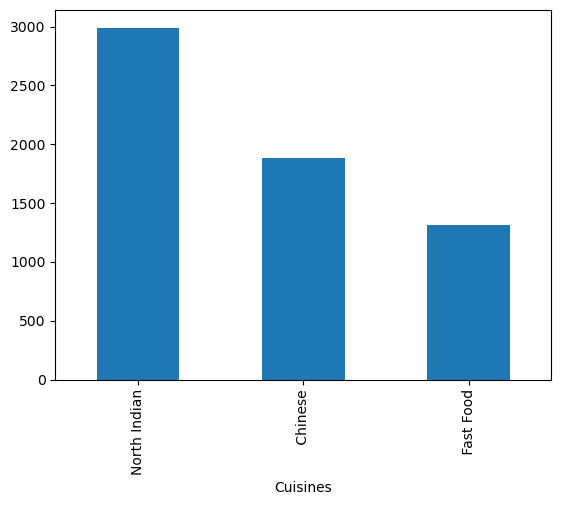

In [94]:
Top3_cuisine = T3.str.split(',').explode().value_counts().head(20)
Top3_cuisine
Top3_cuisines_plot = Top3_cuisines.plot(kind='bar')

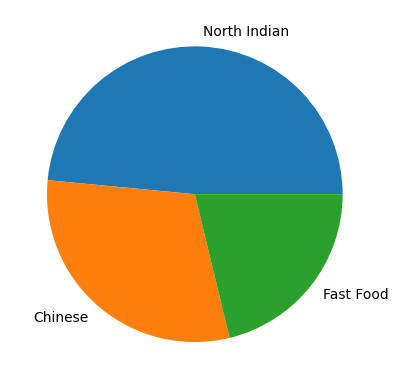

In [96]:
x = np.array(percn_for_top_3_cuisines)
mylabels = ['North Indian', 'Chinese','Fast Food ']
plt.pie(x, labels = mylabels)
plt.show()

##### Calculate the percentage of restaurants that serve each of the top cuisines.

In [98]:
# Calculate the percentage of restaurants that serve each of the top three cuisines
CountRest = cognify['Restaurant Name'].count()
for top3 in Top3_cuisines:
    percentage = ( Top3_cuisines/CountRest ) * 100
    percentage = round(percentage,1)
print("Top 3 Most Common Cuisines:")
print(Top3_cuisines)
print("\nPercentage of Restaurants Serving Each Top Cuisine:")
print(percentage.astype(str) +'%')


Top 3 Most Common Cuisines:
Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64

Percentage of Restaurants Serving Each Top Cuisine:
Cuisines
North Indian    31.3%
 Chinese        19.7%
 Fast Food      13.8%
Name: count, dtype: object


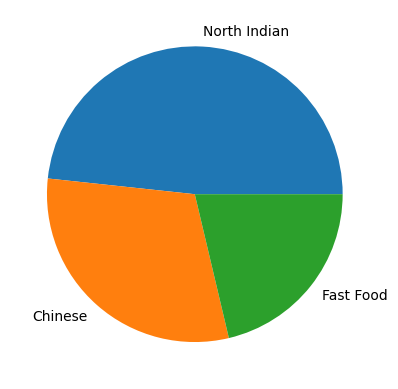

In [100]:
y = np.array(percentage)
chatlabel = ['North Indian', 'Chinese','Fast Food']
plt.pie(y, labels = chatlabel)
plt.show()


### level 1 - TASK 2 (Task: City Analysis)

#### Identify the city with the highest number of restaurants in the dataset.

In [170]:
#Identify the city with the highest number of restaurants in the dataset.
CityRest = cognify.groupby(cognify['City'])['Restaurant Name'].count().sort_values(ascending= False).head(1)
print(f'The city with the highest number of restaurant is:{CityRest}')

The city with the highest number of restaurant is:City
New Delhi    5473
Name: Restaurant Name, dtype: int64


Text(0.5, 1.0, 'Top 10 cities with the highest number of restaurants')

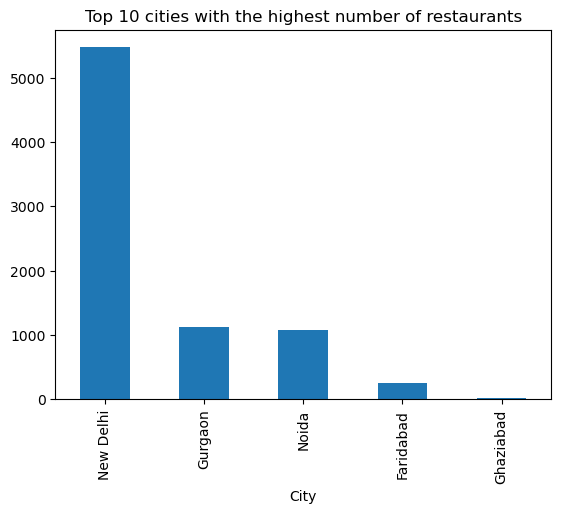

In [17]:
CityRest = cognify.groupby(cognify['City'])['Restaurant Name'].count().sort_values(ascending= False).head(5)
Rest_city = CityRest.plot(kind='bar')
plt.title('Top 10 cities with the highest number of restaurants')


#### Calculate the average rating for restaurants in each city & Determine the city with the highest average rating.

In [172]:
#Calculate the average rating for restaurants in each city.
MostCom = cognify.groupby('City')['Aggregate rating'].mean()
sort = MostCom.sort_values()
Hight_AveRest = sort.max()
print(f'the average rating for restaurants in each city are:{MostCom}')
print(f'city with the highest average rating:{Hight_AveRest}')



the average rating for restaurants in each city are:City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64
city with the highest average rating:4.9


### LEVEL 1 TASK 3 (Task: Price Range Distribution) 

#### Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

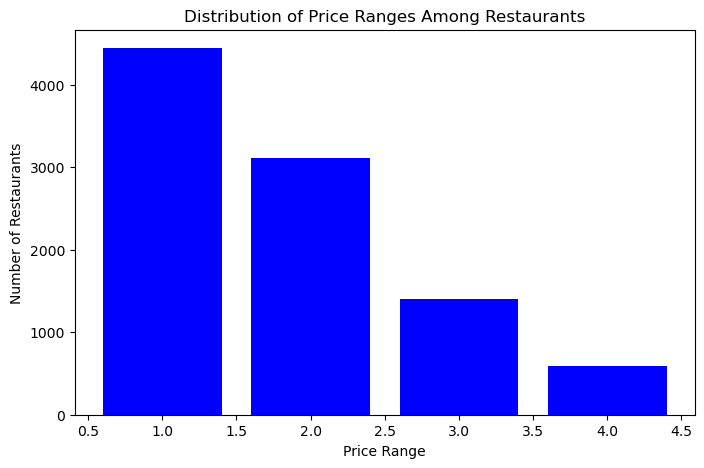

In [69]:
#Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

price_range = cognify["Price range"].value_counts().sort_index() # Count occurrences of each price range

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(price_range.index, price_range.values, color='blue')
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Price Ranges Among Restaurants")
plt.show()




#### Calculate the percentage of restaurants in each price range category.

In [71]:
# Calculate percentage of restaurants in each price range
price_range_percentage = (price_range/ price_range.sum()) * 100
price_range_percentage

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64

### LEVEL 1 TASK 4(Task: Online Delivery)

#### Determine the percentage of restaurants that offer online delivery.

In [178]:
RestYes = cognify['Has Online delivery'].value_counts().min()
Restno = cognify['Has Online delivery'].value_counts().max()
onlineRest = ( RestYes/CountRest ) * 100
onlineRest = round(onlineRest,1)
print("\nPercentage of Restaurants that offer online delivery:")
print(f'{onlineRest}%')



Percentage of Restaurants that offer online delivery:
25.7%


#### Compare the average ratings of restaurants with and without online delivery.

In [25]:
#Compare the average ratings of restaurants with and without online delivery.
cognify["Has Online delivery"] = cognify["Has Online delivery"].str.strip().str.lower()

# Compute average ratings
avg_rating_delivery_yes = cognify[cognify["Has Online delivery"] == "yes"]["Aggregate rating"].mean()
avg_rating_delivery_no = cognify[cognify["Has Online delivery"] == "no"]["Aggregate rating"].mean()

x=avg_rating_delivery_yes = round(avg_rating_delivery_yes,2)
y=avg_rating_delivery_no = round(avg_rating_delivery_no,2)
print("\nComparing the average ratings of restaurants with and without online delivery:")
print(f'Average rating for Restaurant with online delivery: {avg_rating_delivery_yes}, Average rating for Restaurant without online delivery: {avg_rating_delivery_no}')

yes_count = len(cognify[cognify["Has Online delivery"] == "yes"])
no_count = len(cognify[cognify["Has Online delivery"] == "no"])
cognify_len = len(cognify)
X = int((yes_count/cognify_len)*100)
Y = int((no_count/cognify_len)*100)

X,Y



Comparing the average ratings of restaurants with and without online delivery:
Average rating for Restaurant with online delivery: 3.25, Average rating for Restaurant without online delivery: 2.47


(25, 74)

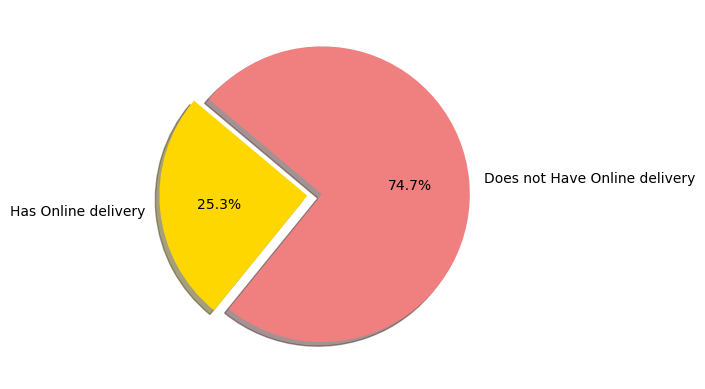

In [27]:
labels = ['Has Online delivery', 'Does not Have Online delivery']
sizes = [25,74]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

## LEVEL 2 - TASK 1(Task: Restaurant Ratings)

#### Analyze the distribution of aggregate ratings and determine the most common rating range.

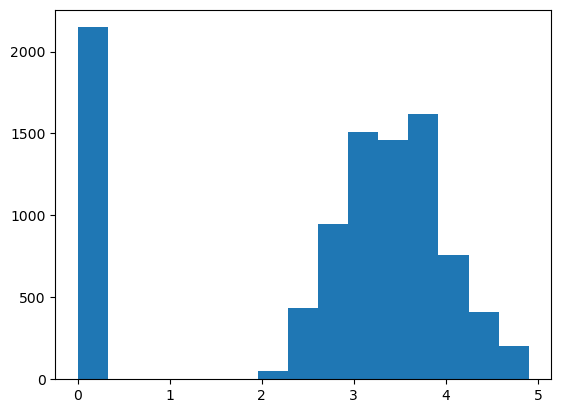

In [45]:
# USING HISTOGRAM TO ANALYSE THE DISTRIBUTION OF AGGREGATE RATINGS 
plt.hist(cognify['Aggregate rating'],bins = 15)
plt.show()

In [61]:
# Calculate the average number of votes received by restaurants
AveNum_Votes = cognify.groupby(cognify['Restaurant Name'])['Votes'].mean()
AveNum_Votes


Restaurant Name
#45                     209.0
#Dilliwaala6            124.0
#InstaFreeze              2.0
#OFF Campus             216.0
#Urban Caf��             49.0
                        ...  
t Lounge by Dilmah       34.0
tashas                  374.0
wagamama                131.0
{Niche} - Cafe & Bar    492.0
�ukura��a Sofras۱       296.0
Name: Votes, Length: 7446, dtype: float64

### LEVEL 2 - Task 2: Cuisine Combination

### Identify the most common combinations of cuisines in the dataset

In [202]:
# Identify the most common combinations of cuisines in the dataset
Most_com_Cuisine = cognify['Cuisines'].value_counts().head(10)
print("\nMost common combinations of cuisines in the dataset")
print(f'10 Most common combinations of {Most_com_Cuisine}')



Most common combinations of cuisines in the dataset
10 Most common combinations of Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


### Determine if certain cuisine combinations tend to have higher ratings

In [140]:
#Determine if certain cuisine combinations tend to have higher ratings.
dff = cognify[['Cuisines','Aggregate rating']]
dff.groupby('Cuisines')['Aggregate rating'].mean().nlargest(10).sort_values(ascending=False)

Cuisines
American, BBQ, Sandwich         4.9
American, Burger, Grill         4.9
American, Caribbean, Seafood    4.9
American, Coffee and Tea        4.9
American, Sandwich, Tea         4.9
BBQ, Breakfast, Southern        4.9
Burger, Bar Food, Steak         4.9
Continental, Indian             4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
Name: Aggregate rating, dtype: float64

In [61]:
#Determine if certain cuisine combinations tend to have higher ratings.
top_ratings = (
    dff.groupby('Cuisines')['Aggregate rating']
.apply(lambda x: x.nlargest(1))  # Change '1' to the desired number of top ratings.
    .reset_index(level=0)
)

# Step 2: Sort the results by 'Aggregate rating' in descending order.
sorted_top_ratings = top_ratings.sort_values(by='Aggregate rating', ascending=False)

# Output the result.
print(sorted_top_ratings)


                                 Cuisines  Aggregate rating
48                    Brazilian, Bar Food               4.9
362               American, Sandwich, Tea               4.9
509                      European, German               4.9
9424                              Chinese               4.9
2495  North Indian, South Indian, Mughlai               4.9
...                                   ...               ...
8028    Lebanese, North Indian, Fast Food               0.0
8994      Lucknowi, Mughlai, North Indian               0.0
6508      North Indian, Mughlai, Armenian               0.0
3273   South Indian, Chinese, Continental               0.0
5116                        Cafe, Tibetan               0.0

[1825 rows x 2 columns]


In [63]:
#Determine if certain cuisine combinations tend to have higher ratings.
avg_ratings = dff.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print(avg_ratings)


Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64


# Level 2 Task 3 Task: Geographic Analysis

#### Plot the locations of restaurants on a map using longitude and latitude coordinates

In [5]:
#Plot the locations of restaurants on a map using longitude and latitude coordinates.
import folium
from folium.plugins import MarkerCluster

# Define the map center
map_center = [cognify["Latitude"].mean(), cognify["Longitude"].mean()]

# Create a map
restaurant_map = folium.Map(location=map_center, zoom_start=12)

# Add markers with clustering
marker_cluster = MarkerCluster().add_to(restaurant_map)

for _, row in cognify.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["Restaurant Name"],
        tooltip=row["Restaurant Name"]
    ).add_to(marker_cluster)
#restaurant_map




#### Identify any patterns or clusters of restaurants in specific areas

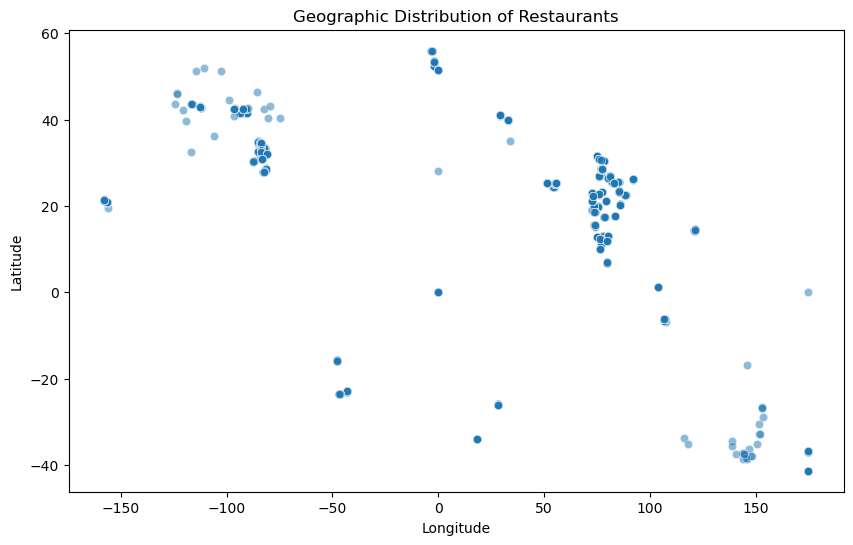

In [9]:
# Identify any patterns or clusters of restaurants in specific areas.
# Scatter plot of restaurant locations
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cognify["Longitude"], y=cognify["Latitude"], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Restaurants")
plt.show()



### LEVEL 2 Task 4: Restaurant Chains

#### Identify if there are any restaurant chains present in the dataset

In [104]:
# Identify if there are any restaurant chains present in the dataset.
Rest_chain = cognify['Restaurant Name'].value_counts()
print(f'there are restaurant chains present in the dataset')
print(f'\n Here is the count of Restaurant chains that exist within the dataset:')
print(Rest_chain)





there are restaurant chains present in the dataset

 Here is the count of Restaurant chains that exist within the dataset:
Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64


#### Analyze the ratings and popularity of different restaurant chains

In [169]:
popularity = cognify.groupby(cognify['Restaurant Name']).agg(rating_mean = ('Aggregate rating', 'mean'),Total_votes = ('Votes','sum'), Number_Rest = ('Restaurant ID','count'))
Hightest_rating_resturant = popularity.nlargest(3,'rating_mean')
most_popular = popularity.nlargest(3, 'Total_votes')
print('\nAnalysis on the ratings and popularity of different restaurant chains shows that')
print(f'The top 3 most rated Restaurant are')
print(Hightest_rating_resturant)
print()
print()
print(f'The top 3 most popular Restaurant by voting are')
print(most_popular)




Analysis on the ratings and popularity of different restaurant chains shows that
The top 3 most rated Restaurant are
                                rating_mean  Total_votes  Number_Rest
Restaurant Name                                                      
Atlanta Highway Seafood Market          4.9          681            1
Bao                                     4.9          161            1
Braseiro da G��vea                      4.9           40            1


The top 3 most popular Restaurant by voting are
                           rating_mean  Total_votes  Number_Rest
Restaurant Name                                                 
Barbeque Nation               4.353846        28142           26
AB's - Absolute Barbecues     4.825000        13400            4
Toit                          4.800000        10934            1


In [171]:
# Group by restaurant name and calculate average rating and total votes
restaurant_analysis = cognify.groupby("Restaurant Name").agg(
    avg_rating=("Aggregate rating", "mean"),
    total_votes=("Votes", "sum"),
    count=("Restaurant ID", "count")
).sort_values(by=["total_votes", "avg_rating"], ascending=[False, False])

# Display the top 10 restaurant chains by popularity
restaurant_analysis.head(10)


,avg_rating,total_votes,count
Restaurant Name,,,
Barbeque Nation,4.353846,28142,26
AB's - Absolute Barbecues,4.825000,13400,4
Toit,4.800000,10934,1
Big Chill,4.475000,10853,4
Farzi Cafe,4.366667,10098,6
Truffles,3.950000,9682,2
Chili's,4.580000,8156,5
Hauz Khas Social,4.300000,7931,1
Joey's Pizza,4.250000,7807,2


## LEVEL 3 Task: Restaurant Reviews

#### TASK 1 -Analyze the text reviews to identify the most common positive and negative keywords

In [229]:
text_review = cognify['Rating text'].value_counts()
text_review

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [231]:
most_common_positive  = text_review.head(3).tail(1)
print(f'most common positive and keywords in:{most_common_positive}')

most common positive and keywords in:Rating text
Good    2100
Name: count, dtype: int64


In [233]:
most_common_negative = text_review.tail(1)
print(f'most common negative keywords in:{most_common_negative}')

most common negative keywords in:Rating text
Poor    186
Name: count, dtype: int64


###  sentiment analysis

#### Analyze the text reviews to identify the most common positive and negative keywords

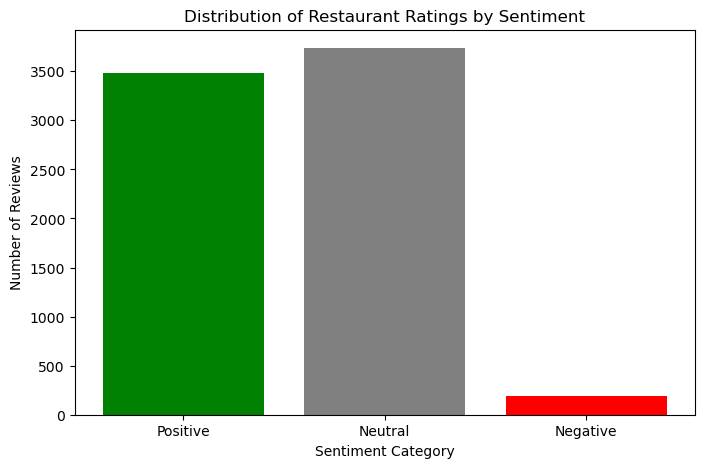

In [235]:
# Define sentiment categories
sentiment_categories = {
    "Positive": ["Excellent", "Very Good", "Good"],
    "Neutral": ["Average"],
    "Negative": ["Poor"]
}

# Aggregate counts by sentiment category
sentiment_counts = {
    "Positive": sum(text_review[label] for label in sentiment_categories["Positive"]),
    "Neutral": sum(text_review[label] for label in sentiment_categories["Neutral"]),
    "Negative": sum(text_review[label] for label in sentiment_categories["Negative"])
}

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=["green", "gray", "red"])
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Restaurant Ratings by Sentiment")
plt.show()


#### Calculate the average length of reviews and explore if there is a relationship between review length and rating

In [260]:
cognify['Sentiment'].value_counts()

Sentiment
Neutral      3737
Positive     3480
Not Rated    2148
Negative      186
Name: count, dtype: int64

#### TASK 2 -Task: Votes Analysis

##### Identify the restaurants with the highest and lowest number of votes

In [322]:
#restaurants with the highest number of votes
Rest_votes_high = cognify.groupby(cognify['Restaurant Name']).agg(Total_votes = ('Votes','sum')).nlargest(1,'Total_votes')
print('\nNumber one Restaurants with the highest number of votes is:')
print(Rest_votes_high)


Number one Restaurants with the highest number of votes is:
                 Total_votes
Restaurant Name             
Barbeque Nation        28142


In [332]:
Rest_votes = cognify.groupby('Restaurant Name').agg(Total_votes=('Votes', 'sum'))
Rest_votes_lowest = Rest_votes.nsmallest(1, 'Total_votes')
lowest_count = Rest_votes['Total_votes'].value_counts().iloc[0]
print('\nRestaurants with the lowest number of votes:')
print(Rest_votes_lowest)
print(f'\nTotal number of restaurants with the lowest number of votes: {lowest_count}')



Restaurants with the lowest number of votes:
                 Total_votes
Restaurant Name             
#hashtag                   0

Total number of restaurants with the lowest number of votes: 907


### Analyze if there is a correlation between the number of votes and the rating of a restaurant

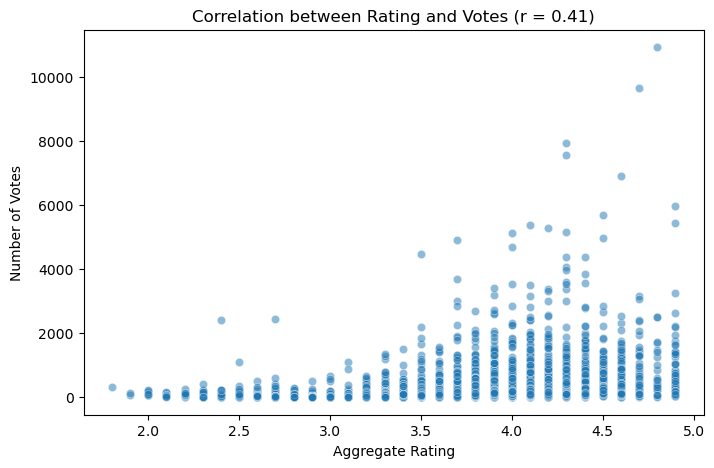

0.40901786341810925

In [337]:
# Filter out unrated entries
cognify_rated = cognify[cognify["Rating text"] != "Not rated"]

# Calculate correlation between votes and aggregate rating
correlation = cognify_rated["Votes"].corr(cognify_rated["Aggregate rating"])

# Scatter plot of Votes vs. Aggregate Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=cognify_rated, x="Aggregate rating", y="Votes", alpha=0.5)
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Votes")
plt.title(f"Correlation between Rating and Votes (r = {correlation:.2f})")
plt.show()

# Display correlation value
correlation


#### Task 3: Price Range vs. Online Delivery andTable Booking

##### Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

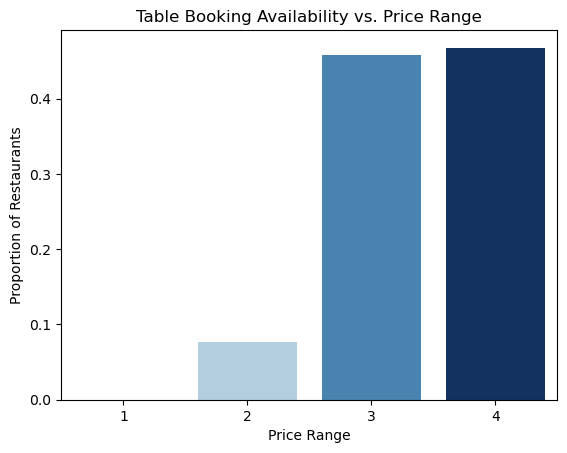

,Has Table booking,Has Online delivery
Price range,,
1,0.000225,0.157741
2,0.076775,0.413106
3,0.457386,0.291903
4,0.467577,0.090444


In [39]:
price_vs_services = cognify.groupby("Price range")[["Has Table booking", "Has Online delivery"]].mean()
pl = sns.barplot(x=price_vs_services.index, y=price_vs_services["Has Table booking"],palette="Blues",hue=price_vs_services.index,legend=False)
pl.set_title("Table Booking Availability vs. Price Range")
pl.set_ylabel("Proportion of Restaurants")
pl.set_xlabel("Price Range")
plt.show()
price_vs_services

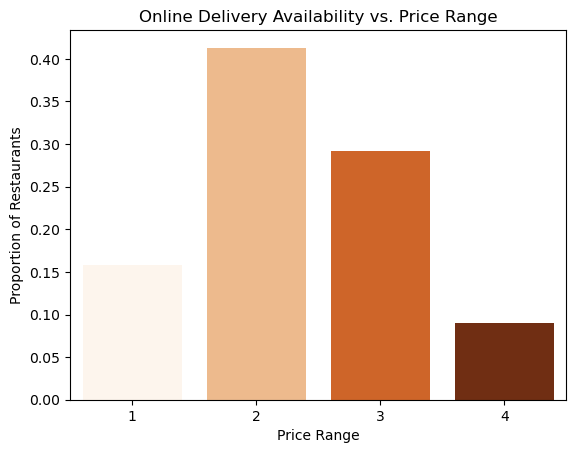

In [31]:
price_vs_services = cognify.groupby("Price range")[["Has Table booking", "Has Online delivery"]].mean()
pl = sns.barplot(x=price_vs_services.index, y=price_vs_services["Has Online delivery"],palette="Oranges",hue=price_vs_services.index,legend=False)
pl.set_title("Online Delivery Availability vs. Price Range")
pl.set_ylabel("Proportion of Restaurants")
pl.set_xlabel("Price Range")
plt.show()
price_vs_services

### Analysis: Table Booking vs. Price Range & online delivery vs. Price Range:

""" 
Table Bookings vs. Price Range:

- Restaurants with higher price ranges (3 and 4) are much more likely to offer table booking.
- Lower price ranges (1 and 2) have very low table booking availability.


Online Delivery vs. Price Range:

-Mid-range restaurants (price range 2) have the highest proportion of online delivery availability.
-The lowest (1) and highest (4) price range restaurants are less likely to offer online delivery.
-Higher-end restaurants (price range 4) rarely provide online delivery services.

Conclusion:
- Higher-priced restaurants prioritize table bookings over online delivery.
- Lower and mid-priced restaurants focus more on online delivery.
- The most affordable restaurants (price range 1) have the lowest availability of both services.

"""


### Determine if higher-priced restaurants are more likely to offer these services

In [130]:
# Convert categorical service columns to binary (1 for 'Yes', 0 for 'No')
service = ["Has Table booking", "Has Online delivery", "Is delivering now"]
cognify[service] = cognify[service_cols].apply(lambda x: x.map({"Yes": 1, "No": 0}))
service_by_price = cognify.groupby("Price range")[service].mean() * 100  # Convert to percentage

service_by_price


,Has Table booking,Has Online delivery,Is delivering now
Price range,,,
1,0.022502,15.774077,0.157516
2,7.677482,41.310633,0.674590
3,45.738636,29.190341,0.426136
4,46.757679,9.044369,0.000000


"""
Table Booking:

Cheapest restaurants (Price range 1): Almost never offer table booking (0.02%).
Mid-range restaurants (Price range 2): 7.68% offer table booking.
Higher-end restaurants (Price range 3 and 4): Around 45-47% offer table booking, significantly higher than lower price ranges.
Online Delivery:

Cheapest restaurants (Price range 1): 15.77% offer online delivery.
Mid-range restaurants (Price range 2): The highest proportion, 41.31% offer online delivery.
Higher-end restaurants (Price range 3 and 4): Decreases to 29.19% (Price 3) and only 9.04% (Price 4).
Currently Delivering:

Across all price ranges, very few restaurants are actively delivering at any given moment.
Key Findings:
Higher-priced restaurants are far more likely to offer table booking.
Lower-priced and mid-range restaurants are more likely to offer online delivery.
Most expensive restaurants (Price 4) have the least focus on delivery services.
"""